# Dimensionality Reduction

1. What is the curse of dimensionality?

High-dimensional datasets are very sparse, making predictions much less reliable than in lower dimensions. High-dimensional feature vectors may cause overfitting.

2. Can PCA be used to reduce the dimensionality of a highly nonlinear
dataset?

Yes, KernelPCA is used for this purpose.

3. Suppose you perform PCA on a 1,000-dimensional dataset, setting
the explained variance ratio to 95%. How many dimensions will the
resulting dataset have?

It's impossible to name exact number of the resulting dimensions because it depends on dataset and on the location of points in the source dimensions. (So actually, from 1 to 1000)


*4. In what cases would you use vanilla PCA, Incremental PCA,
Randomized PCA, or Kernel PCA?

Vanilla PCA and Randomized PCA work with data which can be placed at computer memory. Incremental PCA and Kernel PCA works with data which cannot be placed at memory. Incremental PCA is slower than original and Kernel PCA can be used for nonlinear datasets.


5. How can you evaluate the performance of a dimensionality reduction
algorithm on your dataset?

By the reconstruction error of a reverse transformation.

*6. Does it make any sense to chain two different dimensionality
reduction algorithms?

It can make a sense when you are to decrease performing time. 

7. Try to apply all dimensionality reduction techniques you have already known to a real dataset.
    - Compare algorithms. Do they provide different results or not?
    - Calibrate their parameters.
    - Analyze results and interpret them.

In [101]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import warnings
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

warnings.filterwarnings(action="ignore", message="^internal gelsd")

%matplotlib inline

In [ ]:
df = pd.read_csv('ptrain.csv')
y = df['ACTIVITY_DEC_16']
df.drop(['ACTIVITY_DEC_16'], axis=1, inplace=True)
X = df.copy()
sc = StandardScaler()
sc = sc.fit(X)
X = sc.transform(X)

In [103]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rnd_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [104]:
y_pred = rnd_clf.predict(X)
accuracy_score(y, y_pred)

0.999109832922487

In [109]:
pca = PCA(n_components=1)
X_reduced_pca = pca.fit_transform(X)

In [110]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rnd_clf.fit(X_reduced_pca, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [111]:
y_pred = rnd_clf.predict(X_reduced_pca)
accuracy_score(y, y_pred)

0.9987332237743084

In [107]:
lda = LinearDiscriminantAnalysis()
X_reduced_lda = lda.fit_transform(X,y)

C:\Python\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [108]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rnd_clf.fit(X_reduced_lda, y)

y_pred = rnd_clf.predict(X_reduced_lda)
accuracy_score(y, y_pred)

0.9988359353601753

Great! Prediction has remained almost as accurate as it had been before cutting down on dimensions. So we did well: now there's only 1 dimension and accuracy is very close to original. It should be note that LDA saved more accuracy.

### Beginning from this moment I took only 1001 rows from the dataset, because my computer was literally dying when tried to compute anything bigger.

In [98]:
y_cut = y.loc[:1000]
X_cut = X.loc[:1000, :]

In [112]:
reduced = [X_cut]

In [113]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_cut)
reduced.append(X_reduced_mds)

In [114]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_cut)
reduced.append(X_reduced_isomap)

In [115]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X_cut)
reduced.append(X_reduced_tsne)

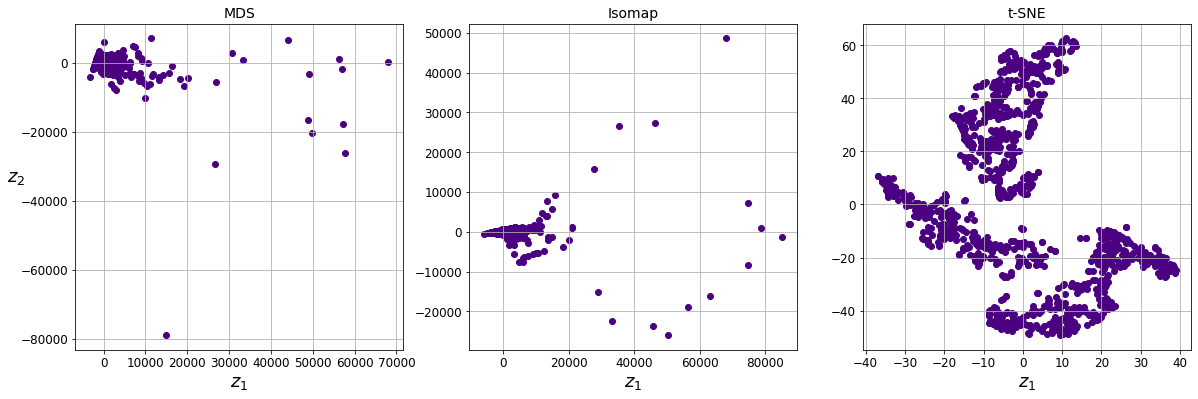

In [52]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(20,6))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='indigo', cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [119]:
accuracy = []

for x in reduced:
    rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rnd_clf.fit(x, y_cut)
    y_pred = rnd_clf.predict(x)
    accuracy.append(accuracy_score(y_cut, y_pred))
    
accuracy   

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

It's difficult to make any conclusion from the score I've got because of too small dataset size. Nevertheless, on this cut dataset accuracy did not become worse. 